#                         Wrangle and Analyze Data
##                                           Doggo Data

In [1]:
import pandas as pd
import numpy as np
import tweepy
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
import re
import itertools
%matplotlib inline

<font size='6' color=red>*Gathering*

In [2]:
# Importing the twitter-archive-enhanced.csv file into a DataFrame.
twitter_ar=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Downloading the tweet image predictions programmatically.
# Then Save the file localy as 'image-predictions.tsv'
file_url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(file_url)
with open(os.path.join(os.getcwd(), file_url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)


In [4]:
# Import image-predictions.tsv in datafram.
image_pr = pd.read_csv("image-predictions.tsv", sep="\t" )

In [5]:
#query Twitter's API for additional data in WeRateDogs Twitter archive

consumer_key = '************************************'
consumer_secret = '************************************'
access_token = '************************************'
access_secret = '************************************'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [6]:
from timeit import default_timer as timer
tweet_ids = twitter_ar.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680


Rate limit reached. Sleeping for: 428


Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
1063: 741099773336379392
Success
1064: 741067306818797568
Success
1065: 740995100998766593
Success
1066: 740711788199743490
Success
1067: 740699697422163968
Success
1068: 740676976021798912
Success
1069: 740373189193256964
Success
1070: 740365076218183684
Success
1071: 740359016048689152
Success
1072: 740214038584557568
Success
1073: 739979191639244800
Success
1074: 739932936087216128
Success
1075: 739844404073074688
Success
1076: 739623569819336705
Success
1077: 739606147276148736
Success
1078: 739544079319588864
Success
1079: 739485634323156992
Success
1080: 739238157791694849
Success
1081: 738891149612572673
Success
10

Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
1312: 707021089608753152
Success
1313: 707014260413456384
Success
1314: 706904523814649856
Success
1315: 706901761596989440
Success
1316: 706681918348251136
Success
1317: 706644897839910912
Success
1318: 706593038911545345
Success
1319: 706538006853918722
Success
1320: 706516534877929472
Success
1321: 706346369204748288
Success
1322: 706310011488698368
Success
1323: 706291001778950144
Success
1324: 706265994973601792
Success
1325: 706169069255446529
Success
1326: 706166467411222528
Success
1327: 706153300320784384
Success
1328: 705975130514706432
Success
1329: 705970349788291072
Success
1330: 705898680587526145
Success
13

Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
1562: 688385280030670848
Success
1563: 688211956440801280
Success
1564: 688179443353796608
Success
1565: 688116655151435777
Success
1566: 688064179421470721
Success
1567: 687841446767013888
Success
1568: 687826841265172480
Success
1569: 687818504314159109
Success
1570: 687807801670897665
Success
1571: 687732144991551489
Success
1572: 687704180304273409
Success
1573: 687664829264453632
Success
1574: 687494652870668288
Success
1575: 687480748861947905
Success
1576: 687476254459715584
Success
1577: 687460506001633280
Success
1578: 687399393394311168
Success
1579: 687317306314240000
Success
15

Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
18

Rate limit reached. Sleeping for: 395


Success
1952: 673686845050527744
Success
1953: 673680198160809984
Success
1954: 673662677122719744
Success
1955: 673656262056419329
Success
1956: 673636718965334016
Success
1957: 673612854080196609
Success
1958: 673583129559498752
Success
1959: 673580926094458881
Success
1960: 673576835670777856
Success
1961: 673363615379013632
Success
1962: 673359818736984064
Success
1963: 673355879178194945
Success
1964: 673352124999274496
Success
1965: 673350198937153538
Success
1966: 673345638550134785
Success
1967: 673343217010679808
Success
1968: 673342308415348736
Success
1969: 673320132811366400
Success
1970: 673317986296586240
Success
1971: 673295268553605120
Success
1972: 673270968295534593
Success
1973: 673240798075449344
Success
1974: 673213039743795200
Success
1975: 673148804208660480
Success
1976: 672997845381865473
Success
1977: 672995267319328768
Success
1978: 672988786805112832
Success
1979: 672984142909456390
Success
1980: 672980819271634944
Success
1981: 672975131468300288
Success
19

Success
2201: 668655139528511488
Success
2202: 668645506898350081
Success
2203: 668643542311546881
Success
2204: 668641109086707712
Success
2205: 668636665813057536
Success
2206: 668633411083464705
Success
2207: 668631377374486528
Success
2208: 668627278264475648
Success
2209: 668625577880875008
Success
2210: 668623201287675904
Success
2211: 668620235289837568
Success
2212: 668614819948453888
Success
2213: 668587383441514497
Success
2214: 668567822092664832
Success
2215: 668544745690562560
Success
2216: 668542336805281792
Success
2217: 668537837512433665
Success
2218: 668528771708952576
Success
2219: 668507509523615744
Success
2220: 668496999348633600
Success
2221: 668484198282485761
Success
2222: 668480044826800133
Success
2223: 668466899341221888
Success
2224: 668297328638447616
Success
2225: 668291999406125056
Success
2226: 668286279830867968
Success
2227: 668274247790391296
Success
2228: 668268907921326080
Success
2229: 668256321989451776
Success
2230: 668248472370458624
Success
22

In [9]:
# read the file in DataFrame
with open('tweet_json.txt', 'r') as f:
    tweet_json = pd.read_json(f, lines= True, encoding = 'utf-8')

# check the data
tweet_json.head(3)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN,NaN


In [13]:
# select the columns of interest : 'id', 'favorite_count','retweet_count'
tweet_json = tweet_json.loc[:,['id','favorite_count','retweet_count']]
tweet_json.rename(columns={'id':'tweet_id'},inplace=True)
# check for the top 5 rows
tweet_json.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35203,7428
1,892177421306343426,30473,5524
2,891815181378084864,22918,3647
3,891689557279858688,38497,7605
4,891327558926688256,36761,8188


<font size='6' color=red>*Assessing*

In [14]:
twitter_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_ar.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
183,856543823941562368,NaN,NaN,2017-04-24 16:22:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Callie. She'll be your navigator today...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/856543823...,12,10,Callie,None,None,None,None
1166,722613351520608256,NaN,NaN,2016-04-20 02:30:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Schnitzel. He's a Tropicana Floofboop. Ge...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722613351...,12,10,Schnitzel,None,None,None,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo,None,pupper,None
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Dido. She's playing the lead role in ""...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686...,13,10,Dido,doggo,None,pupper,None
1564,688116655151435777,NaN,NaN,2016-01-15 21:52:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please send dogs. I'm tired of seeing other st...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688116655...,10,10,None,None,None,None,None
503,813066809284972545,NaN,NaN,2016-12-25 17:00:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tyr. He is disgusted by holiday traffi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813066809...,12,10,Tyr,None,None,None,None
1354,703631701117943808,NaN,NaN,2016-02-27 17:24:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. Based on this picture she's at ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/703631701...,11,10,Bella,None,None,None,None


In [16]:
twitter_ar.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
twitter_ar['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
twitter_ar['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
twitter_ar['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
           ... 
Rascal        1
Ralphson      1
Godzilla      1
Mookie        1
Jersey        1
Name: name, Length: 957, dtype: int64

In [20]:
image_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
image_pr.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
440,674447403907457024,https://pbs.twimg.com/media/CVweVUfW4AACPwI.jpg,1,Brabancon_griffon,0.409909,True,malinois,0.244649,True,bull_mastiff,0.074820,True
1369,761976711479193600,https://pbs.twimg.com/media/CpMVxoRXgAAh350.jpg,3,Labrador_retriever,0.475552,True,Chesapeake_Bay_retriever,0.082898,True,Staffordshire_bullterrier,0.048464,True
865,697463031882764288,https://pbs.twimg.com/media/Ca3i7CzXIAMLhg8.jpg,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True
1905,852226086759018497,https://pbs.twimg.com/ext_tw_video_thumb/85222...,1,prison,0.352793,False,dishwasher,0.110723,False,file,0.094112,False
1937,860276583193509888,https://pbs.twimg.com/media/C_BQ_NlVwAAgYGD.jpg,1,lakeside,0.312299,False,dock,0.159842,False,canoe,0.070795,False
454,674764817387900928,https://pbs.twimg.com/media/CV0_BSuWIAIvE9k.jpg,2,Samoyed,0.634695,True,Arctic_fox,0.309853,False,kuvasz,0.019641,True
675,683449695444799489,https://pbs.twimg.com/media/CXwZ3pbWsAAriTv.jpg,1,Lakeland_terrier,0.303512,True,soft-coated_wheaten_terrier,0.211424,True,golden_retriever,0.170725,True


In [23]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


<font size="5" color=red>Quality and Tidiness Issues</font>

*QUALITY ISSUES*:

- Timestamp should be in datetime format.

- Numerator ratings and denominator ratings did not have appropriate values esp ratings like 4.5 or 3.75 is not captured properly.

- Name of dogs are not captured properly most of the values are "a" which is not a valid Dog name.

- Archive Dataframe contains 2356 rows whereas images has only 2075.

- There are 181 retweets found in archive dataframe which should be removed

- There are tweets without images which should be removed

- Unnecessary columns should be removed

- Dog breeds and prediction data should be condensed

*TIDINESS ISSUES*:

- doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog.

- Information about one type of observational unit (tweets) is spread across three different files/dataframes. So these three dataframes should be merged as they are part of the same observational unit.

<font size='6' color=red>*Cleaning*

### Define:
- Merge all the Datsets

### Code:

In [72]:
df_1 = pd.merge(left=twitter_ar,right=tweet_json,how='left',left_index=False, right_index=False,on='tweet_id')
df_new = pd.merge(left =df_1 ,right =image_pr,how='left',left_index=False, right_index=False,on='tweet_id')

In [73]:
df = df_new.copy() 

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Define : 
- Convert timestamp to datetime type

### Code:

In [75]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [76]:
#Test
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

### Define :
- Exract numerator and denominator ratings


### Code:

In [77]:
# Extract the numerical rating from text
import re
df['new'] = df['text'].str.extract(r'(\d+\.\d+|\d+\/\d+0)',expand = True)

# Fetch ratings numerator and denominator
df['ratings_num'] = df['new'].str.split("/",expand=True)[0]
df['ratings_den'] = df['new'].str.split("/",expand=True)[1]

df['ratings_num'] = df['ratings_num'].astype(float)
df['ratings_den'] = df['ratings_num'].astype(float)



In [78]:
# Drop all the extra columns
df = df.drop(['new','rating_denominator','rating_numerator'],axis = 1)

In [79]:
# test
df['ratings_num'].value_counts()

12.00      557
11.00      462
10.00      462
13.00      349
9.00       155
8.00       102
14.00       56
7.00        54
5.00        35
6.00        32
3.00        19
4.00        17
2.00        10
1.00         8
0.00         2
420.00       2
15.00        2
9.75         2
84.00        1
50.00        1
17.00        1
13.50        1
960.00       1
143.00       1
80.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
4.30         1
92.49        1
5.70         1
121.00       1
2.40         1
8.98         1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
44.00        1
60.00        1
Name: ratings_num, dtype: int64

In [80]:
df['ratings_den'].value_counts()

12.00      557
11.00      462
10.00      462
13.00      349
9.00       155
8.00       102
14.00       56
7.00        54
5.00        35
6.00        32
3.00        19
4.00        17
2.00        10
1.00         8
0.00         2
420.00       2
15.00        2
9.75         2
84.00        1
50.00        1
17.00        1
13.50        1
960.00       1
143.00       1
80.00        1
99.00        1
182.00       1
165.00       1
45.00        1
204.00       1
1776.00      1
666.00       1
4.30         1
92.49        1
5.70         1
121.00       1
2.40         1
8.98         1
11.27        1
11.26        1
88.00        1
144.00       1
9.50         1
44.00        1
60.00        1
Name: ratings_den, dtype: int64

### Define: 
-Extract dog names

### Code:

In [81]:
df['text_split'] = df['text'].str.split()

In [82]:
# Extract Dog names from text
names = []

def extract_names(row):
    
    # after 'named '           
    if 'named' in row['text'] and re.match(r'[A-Z].*', row['text_split'][(row['text_split'].index('named') + 1)]): 
            names.append(row['text_split'][(row['text_split'].index('named') + 1)])
    
    # after 'Here we have '
    elif row['text'].startswith('Here we have ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
            
    #  after'This is '
    elif row['text'].startswith('This is ') and re.match(r'[A-Z].*', row['text_split'][2]):
            names.append(row['text_split'][2].strip('.').strip(','))
    
    # after'Say hello to '
    elif row['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', row['text_split'][3]):
            names.append(row['text_split'][3].strip('.').strip(','))
    
    # after 'Meet '
    elif row['text'].startswith('Meet ') and re.match(r'[A-Z].*', row['text_split'][1]):
            names.append(row['text_split'][1].strip('.').strip(','))
            
    else:
        names.append('Nameless')
        
        
df.apply(extract_names, axis=1)

df['name'] = names

### *test*

In [83]:
df['name'].value_counts()

Nameless    945
Charlie      11
Lucy         11
Oliver       10
Cooper       10
           ... 
Tyrone        1
Ron           1
Nugget        1
Staniel       1
Spork.        1
Name: name, Length: 956, dtype: int64

### Define:
- Condensing dog stages

### Code:

In [84]:
df['stage'] = df[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

### *Test*

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  name                        2356 non-null   object          

## Define: 
- Remove tweets which does not have images and retweets

### Code:

In [86]:
# removing the tweets without images
df = df[pd.notnull(df['jpg_url'])]
# removing retweets
df = df[pd.isnull(df['retweeted_status_id'])]
df.shape[0]

1994

In [87]:
# Remove extra columns 
df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1, inplace = True)

### *Test:*

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   name                   1994 non-null   object             
 8   doggo                  1994 non-null   object             
 9   floofer                1994 non-null   object             
 10  pupper                 1994 non-null   object             
 11  puppo                  1994 non-null   object           

### Define :
- Combing  predictions data into one column

### Code:

In [89]:
breed = []
conf= []

# define the function
def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        conf.append(0)
        
# apply the function row wise 
df.apply(breed_conf, axis = 1)

df['breed'] = breed
df['confidence'] = conf

### *Test:*

In [90]:
df[['breed','confidence']]

,breed,confidence
0,Unidentifiable,0.000000
1,Chihuahua,0.323581
2,Chihuahua,0.716012
3,Labrador_retriever,0.168086
4,basset,0.555712
...,...,...
2351,miniature_pinscher,0.560311
2352,Rhodesian_ridgeback,0.408143
2353,German_shepherd,0.596461
2354,redbone,0.506826


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   name                   1994 non-null   object             
 8   doggo                  1994 non-null   object             
 9   floofer                1994 non-null   object             
 10  pupper                 1994 non-null   object             
 11  puppo                  1994 non-null   object           

### Define:
- Remove unnecessary columns

### Code:

In [92]:
df.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
         'p3_dog','img_num', 'text_split','doggo', 'floofer', 'pupper','puppo'],axis =1,inplace =True)

### *Test:*

In [93]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'favorite_count',
       'retweet_count', 'jpg_url', 'ratings_num', 'ratings_den', 'stage',
       'breed', 'confidence'],
      dtype='object')

### Define:
- Redefine The nameless , Undefined Breed , Undefined Stage and zeros values

### Code:

In [94]:
df.loc[df['name'] == 'Nameless'] = None
df.loc[df['breed'] == 'Unidentifiable', 'breed'] = None
df.loc[df['stage'] == 'None', 'dog_type'] = None
df.loc[df['ratings_num'] == 0.0, 'rating'] = np.nan
df.loc[df['ratings_den'] == 0.0, 'rating'] = np.nan
df.loc[df['confidence'] == 0.0, 'confidence'] = np.nan

### *Test:*

In [95]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,favorite_count,retweet_count,jpg_url,ratings_num,ratings_den,stage,breed,confidence,dog_type,rating
0,8.924206e+17,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,35203.0,7428.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,13.0,13.0,None,None,NaN,NaN,NaN
1,8.921774e+17,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,30473.0,5524.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,13.0,13.0,None,Chihuahua,0.323581,NaN,NaN
2,8.918152e+17,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,22918.0,3647.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,12.0,12.0,None,Chihuahua,0.716012,NaN,NaN
3,8.916896e+17,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,38497.0,7605.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,13.0,13.0,None,Labrador_retriever,0.168086,NaN,NaN
4,8.913276e+17,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,36761.0,8188.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,12.0,12.0,None,basset,0.555712,NaN,NaN


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1369 non-null   float64            
 1   in_reply_to_status_id  1 non-null      float64            
 2   in_reply_to_user_id    1 non-null      float64            
 3   timestamp              1369 non-null   datetime64[ns, UTC]
 4   source                 1369 non-null   object             
 5   text                   1369 non-null   object             
 6   expanded_urls          1369 non-null   object             
 7   name                   1369 non-null   object             
 8   favorite_count         1362 non-null   float64            
 9   retweet_count          1362 non-null   float64            
 10  jpg_url                1369 non-null   object             
 11  ratings_num            1368 non-null   float64          

In [98]:
# Save final clean master data as csv file
df.to_csv('twitter_archive_master.csv', encoding = 'utf-8')

<font size='6' color=red>*Analyzing Data*

In [99]:
df = pd.read_csv('twitter_archive_master.csv')

In [100]:
# Correlation netween retweets, ratings_num and favorites
df[['favorite_count', 'retweet_count']].corr(method='pearson')

,favorite_count,retweet_count
favorite_count,1.00000,0.92633
retweet_count,0.92633,1.00000


<font color=green >With this correlation we can say that there is strong correlation between favorites and retweets

In [101]:
# Relation between stage and numerator ratings
df.groupby('stage')['ratings_num'].describe()

,count,mean,std,min,25%,50%,75%,max
stage,,,,,,,,
None,1190.0,12.170294,51.223705,2.0,10.0,11.0,12.0,1776.00
doggo,36.0,12.083333,1.480830,8.0,11.0,12.0,13.0,14.00
floofer,5.0,11.600000,1.140175,10.0,11.0,12.0,12.0,13.00
pupper,122.0,10.998033,7.630242,3.0,10.0,10.5,11.0,92.49
puppo,15.0,11.800000,1.264911,9.0,11.5,12.0,13.0,13.00


In [102]:
# Trend across introduction of  terms 
df.groupby('stage')['timestamp'].describe()

,count,unique,top,freq
stage,,,,
None,1191,1191,2015-12-19 16:47:58+00:00,1
doggo,36,36,2016-08-23 21:09:14+00:00,1
floofer,5,5,2016-05-21 00:50:46+00:00,1
pupper,122,122,2015-12-06 00:17:55+00:00,1
puppo,15,15,2016-06-03 01:07:16+00:00,1


In [103]:
# Trend across introduction of  terms 
df.groupby('stage')['timestamp'].describe()

,count,unique,top,freq
stage,,,,
None,1191,1191,2015-12-19 16:47:58+00:00,1
doggo,36,36,2016-08-23 21:09:14+00:00,1
floofer,5,5,2016-05-21 00:50:46+00:00,1
pupper,122,122,2015-12-06 00:17:55+00:00,1
puppo,15,15,2016-06-03 01:07:16+00:00,1


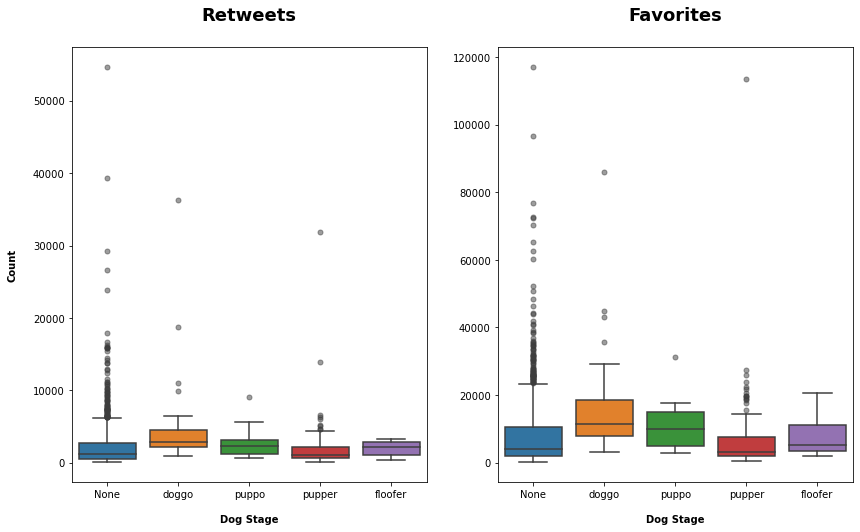

In [105]:
# Set outlier style
flierprops = dict(marker='o', alpha=0.5, markeredgewidth=1)

plt.subplots(figsize=(14, 8))
plt.subplot(121)
sns.boxplot(x=df.stage, y=df.retweet_count, flierprops=flierprops, linewidth=1.5)
plt.title('Retweets\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Stage', weight='bold')
plt.ylabel('Count\n', weight='bold');

plt.subplot(122)
sns.boxplot(x=df.stage, y=df.favorite_count, flierprops=flierprops, linewidth=1.5)
plt.title('Favorites\n', fontsize=18, weight='bold')
plt.xlabel('\nDog Stage', weight='bold')
plt.ylabel('');
plt.savefig('boxplot.png')

<font color=green> Among all the breeds, puppers got the lowest ratings and since the minimum of floffer is 10 and upon reading timestamps data along with breeds, we realized that term floofers are consistently good rated dogs.

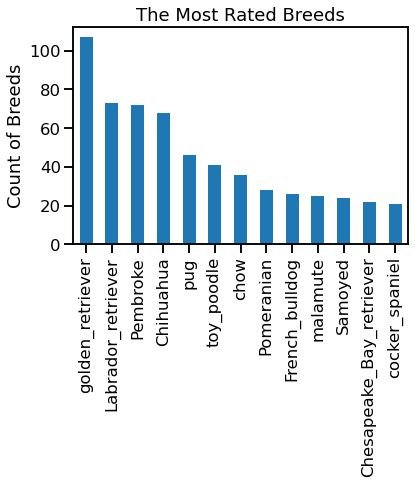

In [108]:
# Most rated breeds analysis
top=df.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Breeds');
plt.ylabel('Count of Breeds');

<font color=green > golden_retriever is the highest rated breed among all other breeds.

In [109]:
# Ratings trends among top 10 breeds
df_ratings = df.groupby('breed')['ratings_num'].describe().nlargest(10,'count')
df_ratings =df_ratings[['count','mean']]
df_ratings

,count,mean
breed,,
golden_retriever,106.0,11.674528
Labrador_retriever,73.0,11.219178
Pembroke,72.0,11.352778
Chihuahua,68.0,10.500000
pug,46.0,10.152174
toy_poodle,41.0,11.048780
chow,36.0,11.444444
Pomeranian,28.0,10.812500
French_bulldog,26.0,11.307692


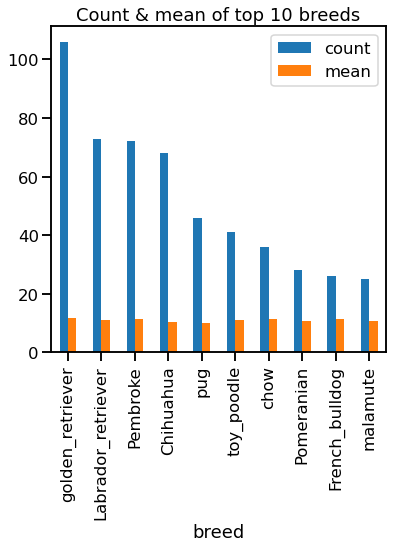

In [110]:
df_ratings.plot(kind='bar',figsize= [6,6]);
plt.title('Count & mean of top 10 breeds');

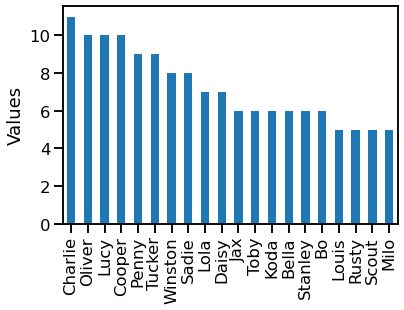

In [111]:
# popular top 20 names of Dog
top_names =df['name'].value_counts().nlargest(20)
plt.ylabel('Values')
top_names.plot(kind="bar");

In [114]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

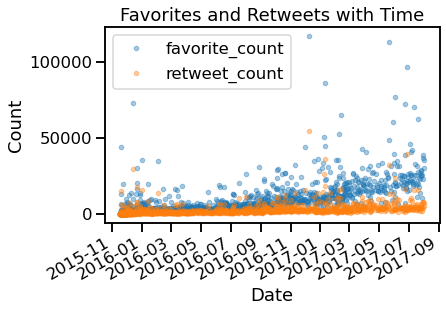

In [115]:
# Favorites and retweets trend over time
df[['favorite_count', 'retweet_count']].plot(style = '.', alpha = 0.4)
plt.title('Favorites and Retweets with Time')
plt.xlabel('Date')
plt.ylabel('Count');

<font color=green> The favorite and retweets increase among the time.